<a href="https://colab.research.google.com/github/ewattudo/datamanagement/blob/main/PS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PS 1 - Erick Watt-Udogu

# Setup Code

In [20]:
#Using code from previous projects and Dr. Adam
import time, os, sys, re #basics
import zipfile, json, datetime, string
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler

import missingno as msno

from google.colab import files

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter()
data_table.max_columns = 50

%matplotlib inline

import pandas as pd
import urllib.request
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

!pip install geopandas==1.0.1
!pip install mapclassify
import geopandas as gpd

import time, webbrowser, zipfile

from google.colab import data_table
data_table.enable_dataframe_formatter()

import plotly.express as px
import plotly.graph_objects as go

# Importing Files

## List of U.S. states and territories by African-American population (HTML)

Source: Wikipedia https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_African-American_population

In [4]:
aapop = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_African-American_population',match="State/Territory")[0].head(65)
aapop.head(5)

,State/Territory,1790,1800,1810,1820,1830,1840,1850,1860,1870,...,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
0,United States of America,19.3%,18.9%,19.0%,18.4%,18.1%,16.8%,15.7%,14.1%,12.7%,...,9.7%,9.8%,10.0%,10.5%,11.1%,11.7%,12.1%,12.9%,13.6%,14.2%
1,Alabama,NaN,41.4%,29.0%,33.2%,38.5%,43.3%,44.7%,45.4%,47.7%,...,35.7%,34.7%,32.0%,30.0%,26.2%,25.6%,25.3%,26.0%,26.3%,26.8%
2,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.2%,0.2%,NaN,3.0%,3.0%,3.4%,4.1%,4.3%,4.7%,4.8%
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.02%,0.04%,0.02%,NaN
4,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3%,0.3%,...,2.5%,3.0%,3.5%,3.3%,3.0%,2.8%,3.0%,3.6%,5.0%,6.2%


## Graduate School Geofence Campaign Data (CSV)

Source: Provided by LocalIQ the Geofence Vendor

In [5]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/datamanagement/refs/heads/main/Geofence%20Report%20With%20Creatives.csv", "Geofence.csv")
Geofence = pd.read_csv('Geofence.csv')
Geofence.head(5)

,Date,Campaign Name,Geofences,Impressions,Clicks,CTR,Walk-ins,CPC,CPW,CPM,Spend
0,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,Camden Waterfront District\t1 Riverside Drive\...,179,0,0.00%,0,0%,$0.00,$7.05,$1.26
1,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,Rowan University\t201 Mullica Hill Road\tGlass...,28356,49,0.17%,0,4.04%,$0.00,$6.98,$197.96
2,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,New Jersey Department of Environmental Protect...,37,0,0.00%,0,0%,$0.00,$6.99,$0.26
3,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,New Jersey Department of Human Services\t222 S...,28,0,0.00%,0,0%,$0.00,$7.01,$0.20
4,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,New Jersey Department of Labor & Workforce Dev...,61,0,0.00%,0,0%,$0.00,$7.22,$0.44


## World Countries (SHP)

Source: World Bank https://datacatalogfiles.worldbank.org/ddh-published/0038272/DR0046659/wb_countries_admin0_10m.zip

In [6]:
! wget -q -O Countries.zip https://datacatalogfiles.worldbank.org/ddh-published/0038272/DR0046659/wb_countries_admin0_10m.zip
zip_ref = zipfile.ZipFile('Countries.zip', 'r'); zip_ref.extractall(); zip_ref.close()
Countries=gpd.read_file('/content/WB_countries_Admin0_10m/WB_countries_Admin0_10m.shp')
Countries.head(5)

,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,...,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry
0,1,Admin-0 country,2,Sovereign country,Republic of Indonesia,None,260580739,17,3028000.0,2017,...,Indonesien,Endonezya,Indonesia,印度尼西亚,Indonesia,None,EAP,495.029918,153.078608,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,2,Admin-0 country,2,Sovereign country,Malaysia,None,31381992,15,863000.0,2017,...,Malaysia,Malezya,Malaysia,马来西亚,Malaysia,None,EAP,68.456913,26.703172,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,3,Admin-0 country,2,Sovereign country,Republic of Chile,None,17789267,14,436100.0,2017,...,Chile,Şili,Chile,智利,Chile,None,LCR,416.997272,76.761813,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,4,Admin-0 country,2,Sovereign country,Plurinational State of Bolivia,None,11138234,14,78350.0,2017,...,Bolivia,Bolivya,Bolivia,玻利維亞,Bolivia,None,LCR,54.345991,92.203587,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,5,Admin-0 country,2,Sovereign country,Republic of Peru,None,31036656,15,410400.0,2017,...,Peru,Peru,Peru,秘鲁,Peru,None,LCR,73.262192,106.417089,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


# Reviewing Data

Here I am just taking a look at the files. This will provide me with a plan for manipulating the data inorder to make it useful.

## African American Population

In [10]:
aapop.head(5)

,State/Territory,1790,1800,1810,1820,1830,1840,1850,1860,1870,...,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
0,United States of America,19.3%,18.9%,19.0%,18.4%,18.1%,16.8%,15.7%,14.1%,12.7%,...,9.7%,9.8%,10.0%,10.5%,11.1%,11.7%,12.1%,12.9%,13.6%,14.2%
1,Alabama,NaN,41.4%,29.0%,33.2%,38.5%,43.3%,44.7%,45.4%,47.7%,...,35.7%,34.7%,32.0%,30.0%,26.2%,25.6%,25.3%,26.0%,26.3%,26.8%
2,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.2%,0.2%,NaN,3.0%,3.0%,3.4%,4.1%,4.3%,4.7%,4.8%
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.02%,0.04%,0.02%,NaN
4,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3%,0.3%,...,2.5%,3.0%,3.5%,3.3%,3.0%,2.8%,3.0%,3.6%,5.0%,6.2%


In [24]:
#All objects. I am going to have to turn all these into numbers.
aapop.dtypes

,0
State/Territory,object
1790,object
1800,object
1810,object
1820,object
1830,object
1840,object
1850,object
1860,object
1870,object


In [14]:
#I wasn't planning on updating all the years, but the AI made it easy. It seems to anticipate that I wanted to change it.
aapop['1790'] = aapop['1790'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1800'] = aapop['1800'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1810'] = aapop['1810'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1820'] = aapop['1820'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1830'] = aapop['1830'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1840'] = aapop['1840'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1850'] = aapop['1850'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1860'] = aapop['1860'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1870'] = aapop['1870'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1880'] = aapop['1880'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1890'] = aapop['1890'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1900'] = aapop['1900'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1910'] = aapop['1910'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1920'] = aapop['1920'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1930'] = aapop['1930'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1940'] = aapop['1940'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1950'] = aapop['1950'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1960'] = aapop['1960'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1970'] = aapop['1970'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1980'] = aapop['1980'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1990'] = aapop['1990'].str.replace('[\%]', '', regex=True).astype(float)
aapop['2000'] = aapop['2000'].str.replace('[\%]', '', regex=True).astype(float)
aapop['2010'] = aapop['2010'].str.replace('[\%]', '', regex=True).astype(float)
aapop['2020'] = aapop['2020'].str.replace('[\%]', '', regex=True).astype(float)

In [15]:
#I need to take the US out, it's going to skew the data once I change all the fields from object.
aapop.describe()

,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
count,19.000000,26.000000,29.000000,30.000000,31.000000,32.000000,38.000000,45.000000,49.000000,49.000000,...,52.000000,52.000000,51.000000,52.000000,52.000000,52.000000,56.000000,57.000000,57.000000,53.000000
mean,15.352632,16.534615,18.372414,17.683333,19.345161,18.687500,15.992105,13.171111,12.526531,12.571429,...,9.496154,9.253846,9.374510,9.728846,10.021154,10.365385,11.315536,12.007193,12.637018,12.771698
std,14.957806,15.993872,17.620299,17.930807,19.389737,19.595008,18.826640,18.269306,18.141318,18.416354,...,13.434999,12.874621,11.839068,11.991375,12.524444,12.395586,14.720913,14.392811,13.805798,10.193218
min,0.300000,0.400000,0.300000,0.300000,0.200000,0.200000,0.000000,0.000000,0.100000,0.200000,...,0.100000,0.000000,0.000000,0.100000,0.200000,0.200000,0.020000,0.040000,0.020000,1.200000
25%,2.350000,2.950000,2.900000,2.200000,1.650000,1.075000,0.600000,0.300000,0.600000,0.500000,...,0.400000,0.400000,0.850000,1.525000,1.750000,1.800000,2.150000,2.500000,2.900000,5.000000
50%,9.500000,8.900000,13.000000,11.900000,15.500000,12.600000,3.700000,1.600000,1.800000,1.900000,...,3.400000,3.600000,4.400000,5.200000,6.350000,6.900000,6.850000,7.500000,8.700000,9.700000
75%,24.200000,30.150000,32.200000,32.700000,35.400000,33.125000,27.275000,24.900000,22.500000,22.500000,...,13.950000,13.725000,13.200000,12.700000,13.175000,14.025000,15.075000,15.600000,16.100000,17.200000
max,43.700000,44.600000,55.200000,52.800000,58.500000,56.400000,58.900000,58.600000,58.900000,60.700000,...,50.200000,49.200000,45.300000,53.900000,71.100000,70.300000,76.620000,76.190000,76.030000,44.200000


<Axes: >

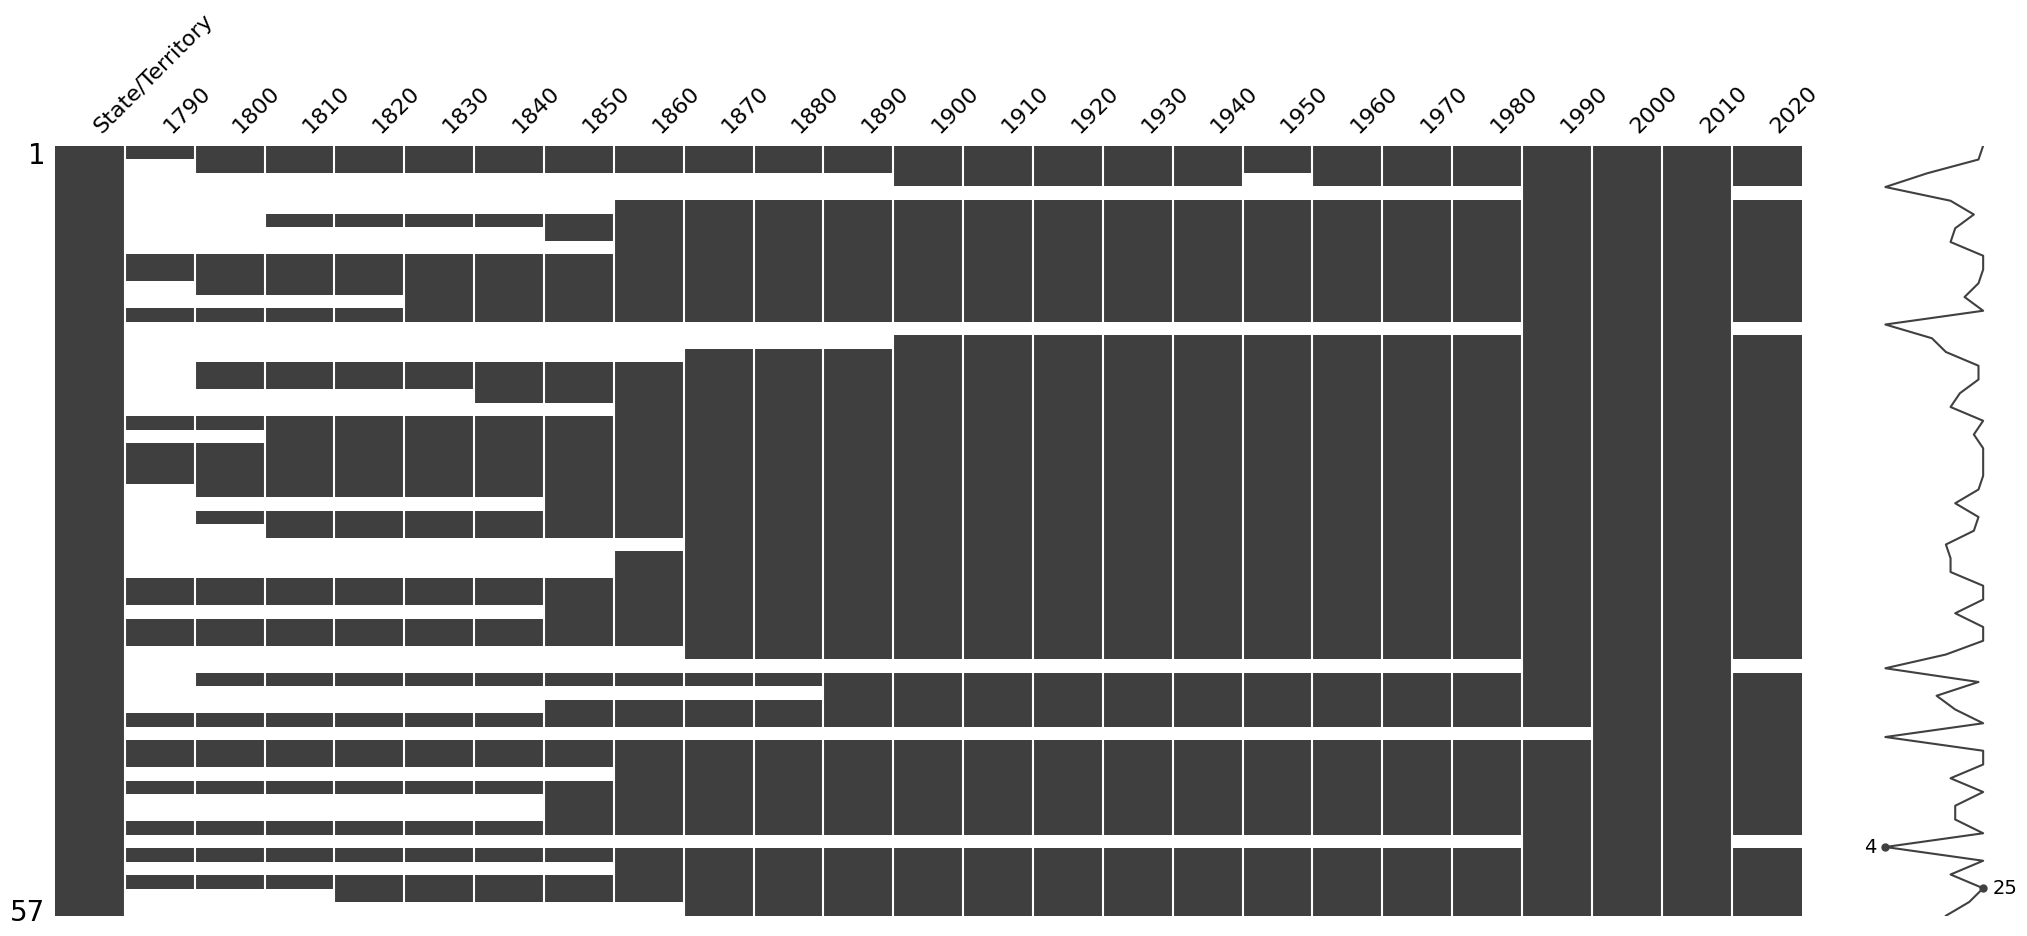

In [30]:
#This all makes sense. I hypothesize that the missing data is related to when statehood was granted. I think I might just pull 2010 and 2020
msno.matrix(aapop)

## Geofence

In [37]:
Geofence.head(5)

,Date,Campaign Name,Geofences,Impressions,Clicks,CTR,Walk-ins,CPC,CPW,CPM,Spend
0,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,Camden Waterfront District\t1 Riverside Drive\...,179,0,0.00%,0,0%,$0.00,$7.05,$1.26
1,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,Rowan University\t201 Mullica Hill Road\tGlass...,28356,49,0.17%,0,4.04%,$0.00,$6.98,$197.96
2,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,New Jersey Department of Environmental Protect...,37,0,0.00%,0,0%,$0.00,$6.99,$0.26
3,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,New Jersey Department of Human Services\t222 S...,28,0,0.00%,0,0%,$0.00,$7.01,$0.20
4,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,New Jersey Department of Labor & Workforce Dev...,61,0,0.00%,0,0%,$0.00,$7.22,$0.44


In [27]:
#All the percentage data needs to be converted from object, but under the "work smarer not harder" maxim, I am going to choose some of the variables to convert.
Geofence.dtypes

,0
Date,object
Campaign Name,object
Geofences,object
Impressions,int64
Clicks,int64
CTR,object
Walk-ins,int64
CPC,object
CPW,object
CPM,object


In [ ]:
#I had to use Gemini to help me get rid of the "$"
Geofence['Spend'] = Geofence['Spend'].str.replace('[\$,]', '', regex=True).astype(float)

In [ ]:
#I was able to do clickthrough rate myself.
Geofence['CTR'] = Geofence['CTR'].str.replace('[\%,]', '', regex=True).astype(float)

<Axes: >

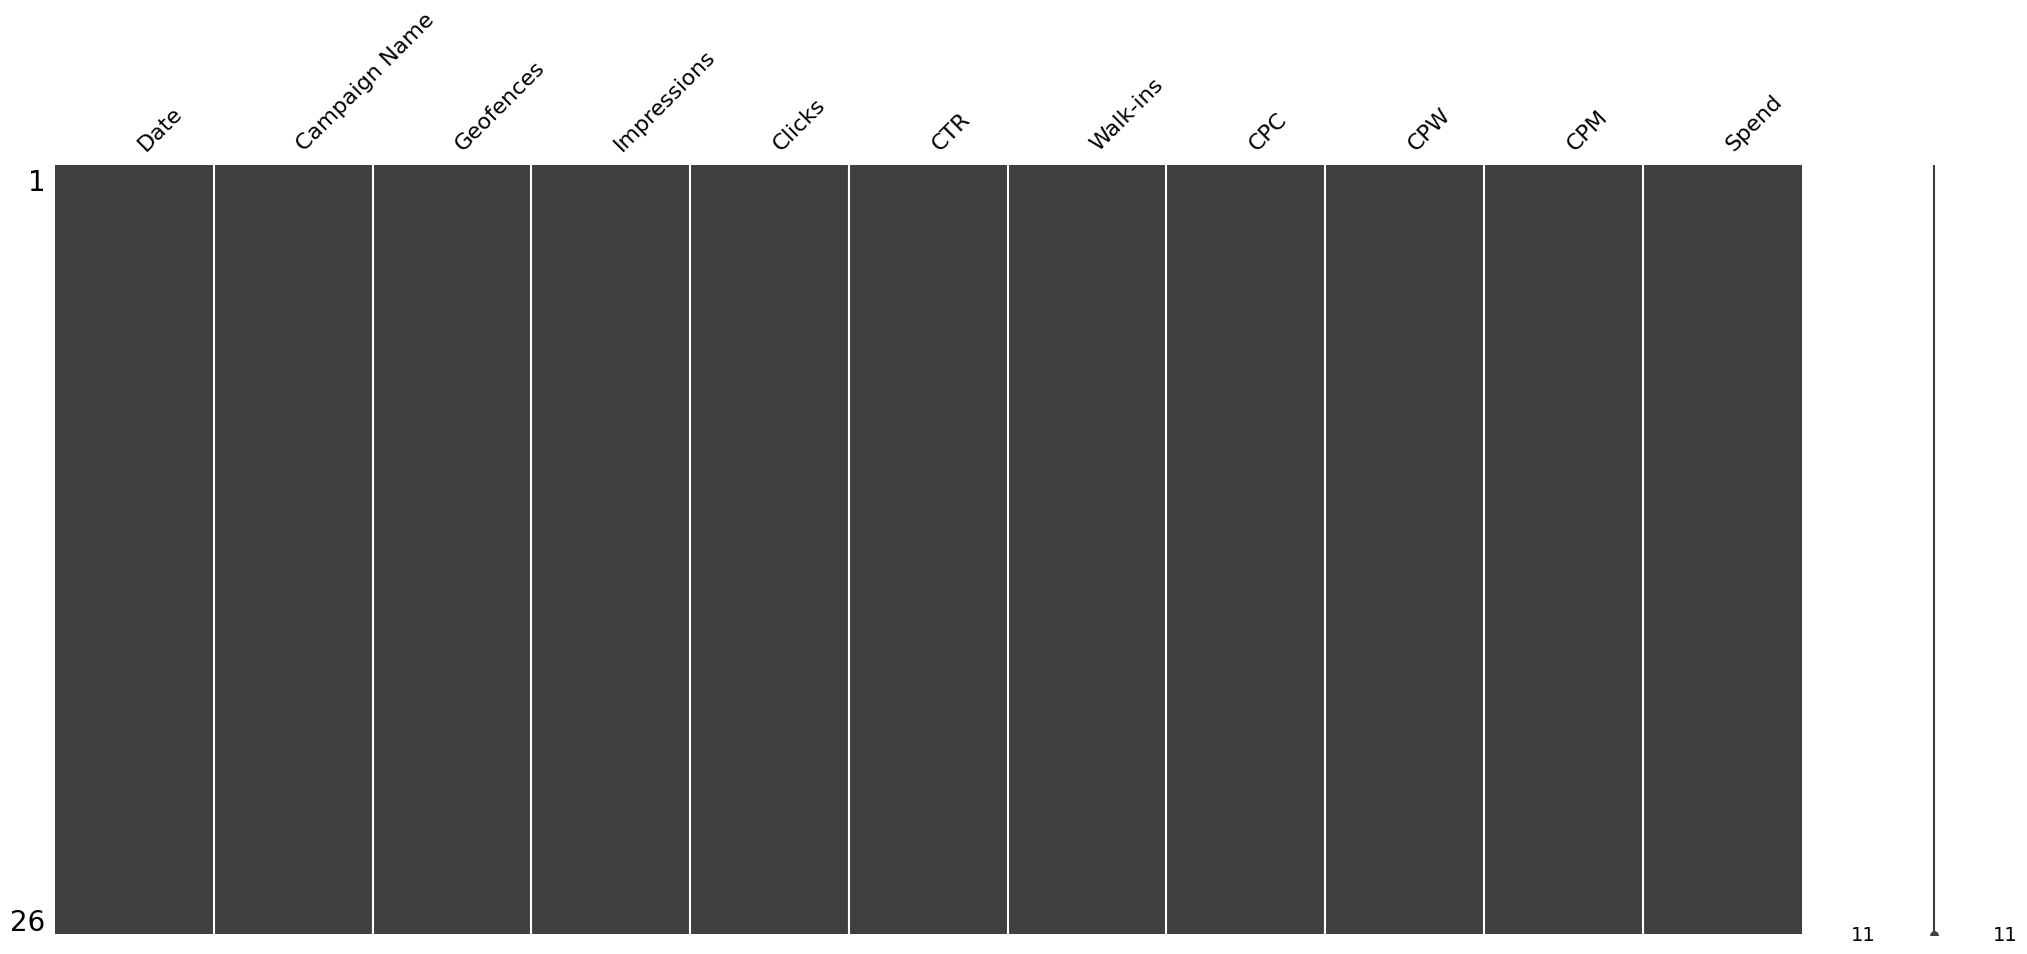

In [28]:
msno.matrix(Geofence)

In [19]:
Geofence.describe()

,Impressions,Clicks,CTR,Walk-ins,Spend
count,26.000000,26.000000,26.000000,26.0,26.000000
mean,5807.038462,9.538462,0.125385,0.0,40.782308
std,17729.734650,27.963163,0.143031,0.0,124.351966
min,28.000000,0.000000,0.000000,0.0,0.200000
25%,187.500000,0.000000,0.000000,0.0,1.302500
50%,873.500000,1.000000,0.090000,0.0,6.130000
75%,2751.000000,5.000000,0.217500,0.0,19.312500
max,88372.000000,138.000000,0.480000,0.0,620.090000


### Description and Manipulation

In [36]:
#Walk-ins column is not needed and there is nothing in it. So I am going to drop it.
Geofence = Geofence.drop(columns=['Walk-ins'])

In [21]:
#I want to make the geofences meaningful, now they are a bunch of addresses. First I am going to see what I have.
#I organized these around Camden Area, NJGov and Colleges and Universities. I think that will simplify a bit.
print(Geofence.Geofences.unique())

['Camden Waterfront District\t1 Riverside Drive\tCamden\tNJ\t08103'
 'Rowan University\t201 Mullica Hill Road\tGlassboro\tNJ\t08028'
 'New Jersey Department of Environmental Protection\t401 East State Street\tTrenton\tNJ\t08608'
 'New Jersey Department of Human Services\t222 South Warren Street\tTrenton\tNJ\t00860'
 'New Jersey Department of Labor & Workforce Development\t1 John Fitch Plaza\tTrenton\tNJ\t08611'
 'Rider University\t2083 Lawrenceville Road\tLawrenceville\tNJ\t08648'
 'Lockheed Martin\t199 Borton Landing Road\tMoorestown\tNJ\t08057'
 'Camden City Hall\t520 Market Street\tCamden\tNJ\t08102'
 'Stockton University\t101 Vera King Farris Drive\tGalloway\tNJ\t08205'
 'The College of New Jersey\t2000 Pennington Road\tEwing\tNJ\t08628'
 'New Jersey Department of the Treasury\t50 West State Street\tTrenton\tNJ\t08608'
 'New Jersey Department of Children and Families\t50 East State Street\tTrenton\tNJ\t08608'
 'New Jersey Department of Banking and Insurance\t20 West State Street\tT

In [22]:
mapped_places = {
    "Camden Waterfront District\t1 Riverside Drive\tCamden\tNJ\t08103": "Camden Area",
    "Rowan University\t201 Mullica Hill Road\tGlassboro\tNJ\t08028": "Colleges and Universities",
    "New Jersey Department of Environmental Protection\t401 East State Street\tTrenton\tNJ\t08608": "NJGov",
    "New Jersey Department of Human Services\t222 South Warren Street\tTrenton\tNJ\t00860": "NJGov",
    "New Jersey Department of Labor & Workforce Development\t1 John Fitch Plaza\tTrenton\tNJ\t08611": "NJGov",
    "Rider University\t2083 Lawrenceville Road\tLawrenceville\tNJ\t08648": "Colleges and Universities",
    "Lockheed Martin\t199 Borton Landing Road\tMoorestown\tNJ\t08057": "Camden Area",
    "Camden City Hall\t520 Market Street\tCamden\tNJ\t08102": "Camden Area",
    "Stockton University\t101 Vera King Farris Drive\tGalloway\tNJ\t08205": "Colleges and Universities",
    "The College of New Jersey\t2000 Pennington Road\tEwing\tNJ\t08628": "Colleges and Universities",
    "New Jersey Department of the Treasury\t50 West State Street\tTrenton\tNJ\t08608": "NJGov",
    "New Jersey Department of Children and Families\t50 East State Street\tTrenton\tNJ\t08608": "NJGov",
    "New Jersey Department of Banking and Insurance\t20 West State Street\tTrenton\tNJ\t08608": "NJGov"
}

Geofence["Categories"] = Geofence["Geofences"].map(mapped_places)
Geofence.head(5)

,Date,Campaign Name,Geofences,Impressions,Clicks,CTR,Walk-ins,CPC,CPW,CPM,Spend,Categories
0,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,Camden Waterfront District\t1 Riverside Drive\...,179,0,0.00,0,0%,$0.00,$7.05,1.26,Camden Area
1,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,Rowan University\t201 Mullica Hill Road\tGlass...,28356,49,0.17,0,4.04%,$0.00,$6.98,197.96,Colleges and Universities
2,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,New Jersey Department of Environmental Protect...,37,0,0.00,0,0%,$0.00,$6.99,0.26,NJGov
3,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,New Jersey Department of Human Services\t222 S...,28,0,0.00,0,0%,$0.00,$7.01,0.20,NJGov
4,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,New Jersey Department of Labor & Workforce Dev...,61,0,0.00,0,0%,$0.00,$7.22,0.44,NJGov


In [26]:
Geofence[['Categories','Impressions', 'Clicks','CTR','Spend']].groupby('Categories').agg(['mean', 'min','max','std']).round(2)

Impressions                       Clicks           \
                                 mean  min    max       std   mean min  max   
Categories                                                                    
Camden Area                   1161.83   53   2780   1239.45   1.67   0    5   
Colleges and Universities    15903.38  187  88372  30761.34  24.88   0  138   
NJGov                         1398.75   28   7307   2109.13   3.25   0   12   

                                   CTR                    Spend                \
                             std  mean  min   max   std    mean   min     max   
Categories                                                                      
Camden Area                 2.07  0.09  0.0  0.26  0.11    8.16  0.37   19.48   
Colleges and Universities  48.69  0.11  0.0  0.23  0.10  111.46  1.30  620.09   
NJGov                       4.29  0.16  0.0  0.48  0.18    9.98  0.20   52.31   

                                   
                              std  
Categories                         
Camden Area                  8.68  
Colleges and Universities  215.79  
NJGov                       15.11

In [34]:
#The Geofences are duplicated. This could be because we are running two different ad treatments or it could be a mistake. I have written to the vendor for clarification.
fig = px.scatter(Geofence, x="CTR", y="Clicks",
                 symbol='Categories', color="Spend",
                 size="Impressions", hover_data=['Geofences'],width=1000,height=750,
                 color_continuous_scale=px.colors.sequential.Turbo)
fig.update_layout(legend=dict(yanchor="top",xanchor="right"),
    title_text = 'Comparing Geofence Impressions, Clicks, and Spend Across Categories')

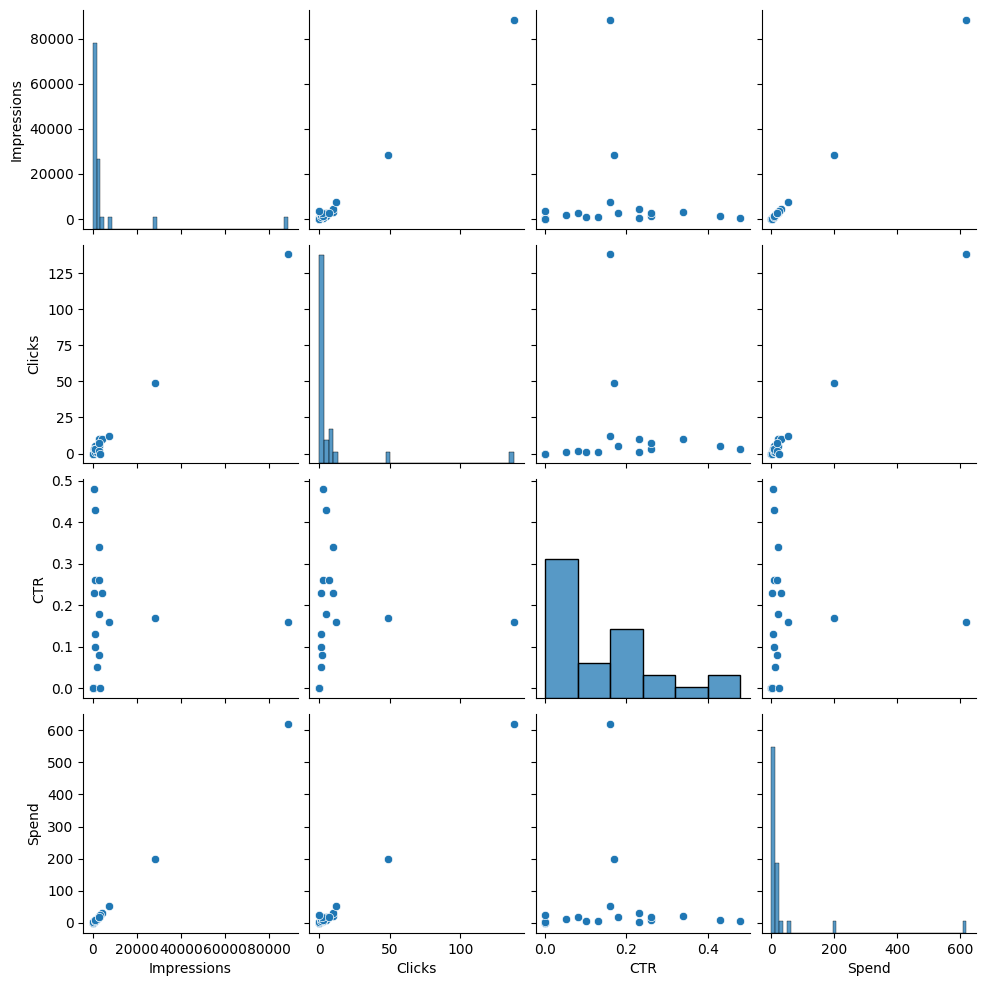

In [39]:
#I like this plot better, but I would not have noticed my duplicate issue without the plot above.
sns.pairplot(Geofence)

## World Data

In [29]:
Countries.dtypes

,0
OBJECTID,int64
featurecla,object
LEVEL,int32
TYPE,object
FORMAL_EN,object
FORMAL_FR,object
POP_EST,int64
POP_RANK,int32
GDP_MD_EST,float64
POP_YEAR,int32


In [16]:
Countries.describe()

,OBJECTID,LEVEL,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,Shape_Leng,Shape_Area
count,251.000000,251.0,2.510000e+02,251.000000,2.510000e+02,251.00000,251.000000,251.000000,251.000000,251.000000
mean,126.000000,2.0,2.961458e+07,11.494024,4.815592e+05,1944.52988,1687.051793,1935.179283,63.152872,61.128765
std,72.601653,0.0,1.239078e+08,3.995368,1.943698e+06,375.74860,755.924468,394.988572,217.498918,243.601360
min,1.000000,2.0,0.000000e+00,1.000000,0.000000e+00,0.00000,-99.000000,0.000000,0.004431,0.000001
25%,63.500000,2.0,1.573210e+05,9.000000,3.167000e+03,2017.00000,2001.000000,2016.000000,2.400842,0.051244
50%,126.000000,2.0,4.926330e+06,12.000000,3.501000e+04,2017.00000,2006.000000,2016.000000,18.826169,5.882082
75%,188.500000,2.0,1.783726e+07,14.000000,2.304185e+05,2017.00000,2010.000000,2016.000000,50.510444,37.990619
max,251.000000,2.0,1.379303e+09,18.000000,2.114000e+07,2017.00000,2012.000000,2016.000000,2573.712484,2925.332609


<Axes: >

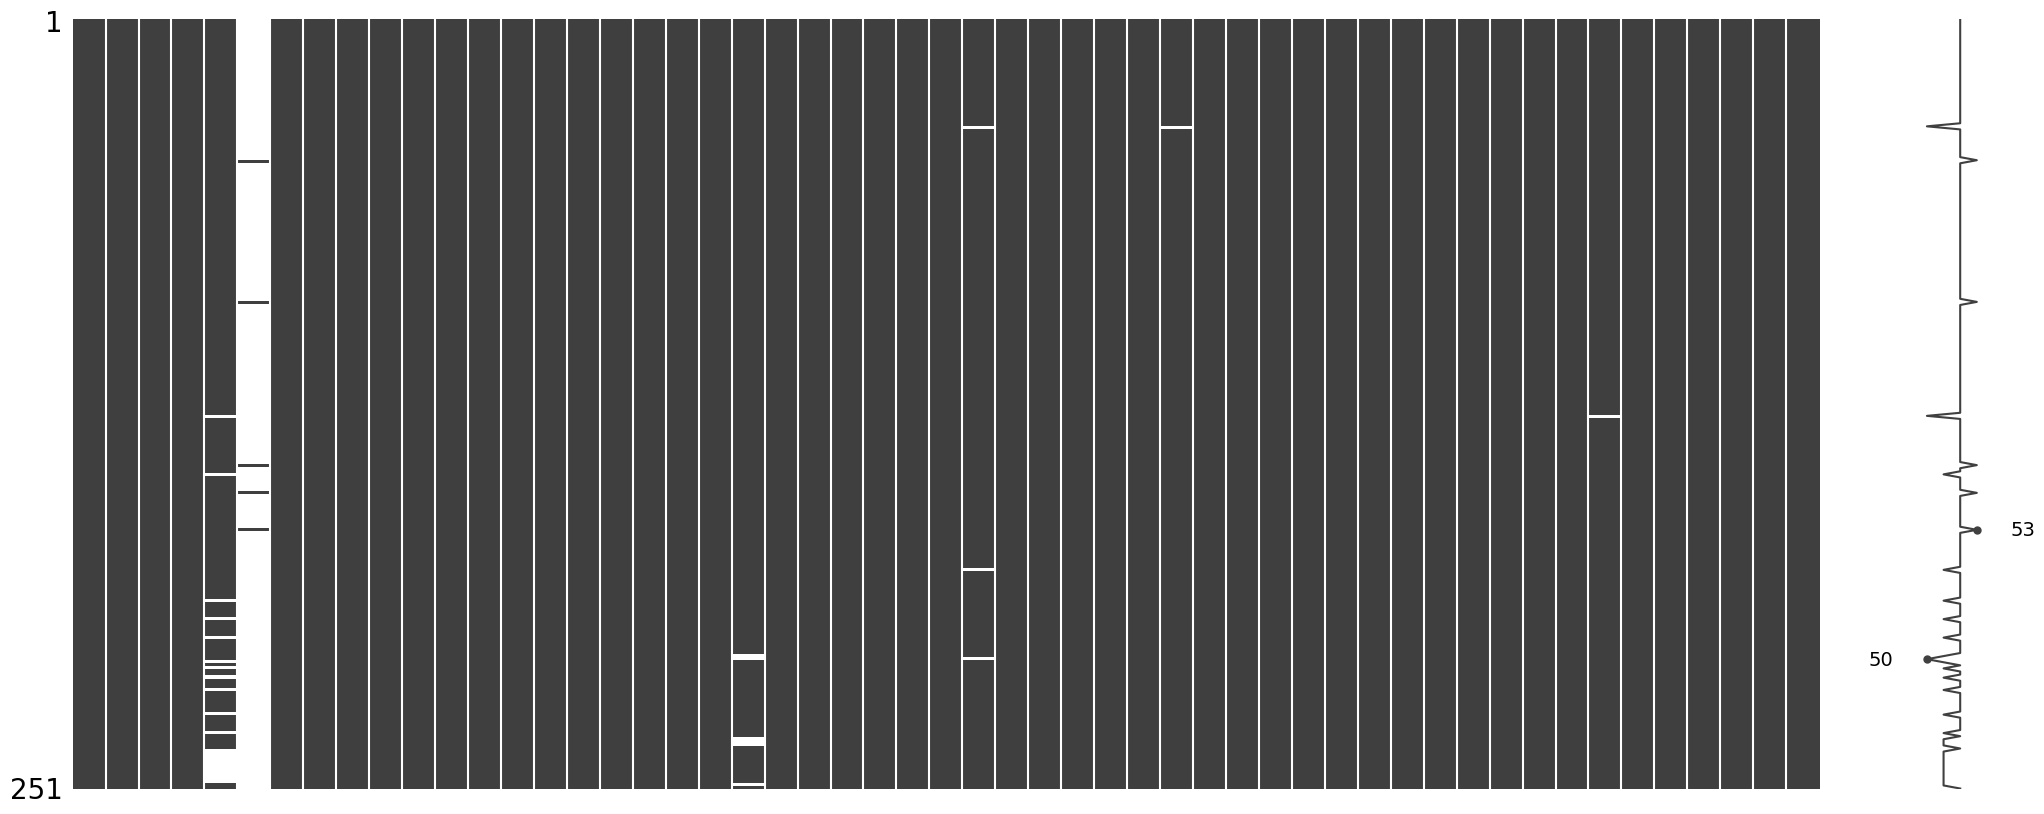

In [32]:
msno.matrix(Countries)